In [1]:
# Import Required Libraries
from matplotlib import pyplot as plt
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier

# Set Up Classification Models
- gnb = Gaussian Naive Bayes
- base_t = Default Decision tree
- per = Perceptron
- base_mlp = Default Multi-Layer Perceptron

In [2]:
# Import Models
import csv
gnb = GaussianNB()
base_t = tree.DecisionTreeClassifier(criterion="entropy")
per = Perceptron()
base_mlp = MLPClassifier(hidden_layer_sizes=(100,), activation="logistic", solver="sgd")

# Data Imports
### Imports the data from data 1 and data 2

In [3]:
# Import Data
test_data_1 = np.genfromtxt('./data 1/test_no_label_1.csv', delimiter=',')
test_data_2 = np.genfromtxt('./data 2/test_no_label_2.csv', delimiter=',')

labeled_test_data_1 = np.genfromtxt('./data 1/test_with_label_1.csv', delimiter=',')
labeled_test_data_2 = np.genfromtxt('./data 2/test_with_label_2.csv', delimiter=',')

train_data_1 = np.genfromtxt('./data 1/train_1.csv', delimiter=',')
train_data_2 = np.genfromtxt('./data 2/train_2.csv', delimiter=',')

val_data_1 = np.genfromtxt('./data 1/val_1.csv', delimiter=',')
val_data_2 = np.genfromtxt('./data 2/val_2.csv', delimiter=',')

# Reference Dictionaries
### Sets up dictionaries to translate values to symbolic names ({0 : 'A', 1 : 'B', etc}

In [4]:
# Get Value Dictionaries
data_1 = {}
with open('data 1/info_1.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None) # Skip header
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        for rows in reader:
            data_1[int(rows[0])] = rows[1]
data_2 = {}
with open('data 2/info_2.csv', mode='r') as infile:
    reader = csv.reader(infile)
    next(reader, None) # Skip header
    with open('coors_new.csv', mode='w') as outfile:
        writer = csv.writer(outfile)
        for rows in reader:
            data_2[int(rows[0])] = rows[1]

# Plotting Utility Method
### Reusable method to return a scatter plot of frequency distributions for a given data set
- takes a dataset as input, and the plot title
    - gets labels for dataset by extracting last column of each row: data_labels
    - generates a tuple (count, label) for each label found
    - reduces list of tuples to a set to get one of each label only
    - assigns labels to x axis on data_x and counts to y axis on data_y

In [5]:
# Distribution Plot Methods
def distribution(data, title, ref):
    data_labels = [ref[(row[-1])] for row in data]
    tuples = sorted(set([(label, data_labels.count(label)) for label in data_labels]))
    print(tuples)
    
    data_x = [x[0] for x in tuples]
    data_y = [y[1] for y in tuples]
    
    plt.scatter(data_x, data_y)
    plt.xlabel("Classes")
    plt.ylabel("Frequencies")
    plt.title(title)
    plt.show()

# Distributions for Data 1 and Data 2
- Training Set
- Labeled Test Set
- Validation Set

[('A', 52), ('B', 43), ('C', 52), ('D', 40), ('E', 38), ('F', 39), ('G', 52), ('H', 44), ('I', 52), ('J', 52), ('K', 52), ('L', 52), ('M', 52), ('N', 52), ('O', 52), ('P', 49), ('Q', 47), ('R', 52), ('S', 43), ('T', 39), ('U', 40), ('V', 39), ('W', 43), ('X', 38), ('Y', 39), ('Z', 44)]
[('A', 4), ('B', 2), ('C', 4), ('D', 3), ('E', 2), ('F', 2), ('G', 4), ('H', 3), ('I', 3), ('J', 4), ('K', 3), ('L', 4), ('M', 3), ('N', 4), ('O', 3), ('P', 3), ('Q', 3), ('R', 4), ('S', 3), ('T', 2), ('U', 3), ('V', 3), ('W', 3), ('X', 2), ('Y', 3), ('Z', 3)]
[('A', 10), ('B', 9), ('C', 10), ('D', 8), ('E', 8), ('F', 8), ('G', 10), ('H', 9), ('I', 10), ('J', 10), ('K', 10), ('L', 10), ('M', 10), ('N', 10), ('O', 10), ('P', 10), ('Q', 10), ('R', 10), ('S', 9), ('T', 8), ('U', 8), ('V', 8), ('W', 9), ('X', 8), ('Y', 8), ('Z', 9)]


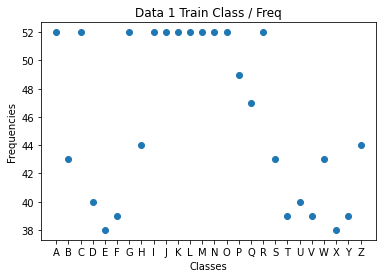

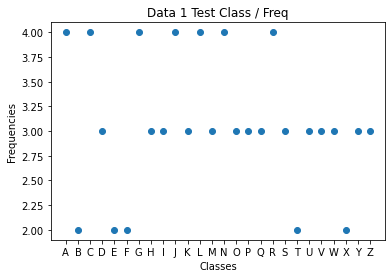

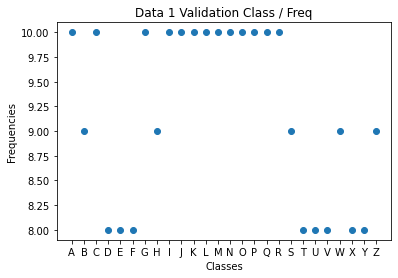

In [6]:
# Distributions for Data 1
distribution(train_data_1, "Data 1 Train Class / Freq", data_1)
distribution(labeled_test_data_1, "Data 1 Test Class / Freq", data_1)
distribution(val_data_1, "Data 1 Validation Class / Freq", data_1)

[('alpha', 1875), ('beta', 225), ('delta', 825), ('gamma', 750), ('lambda', 225), ('mu', 750), ('omega', 225), ('pi', 825), ('sigma', 225), ('xi', 1875)]
[('alpha', 125), ('beta', 15), ('delta', 55), ('gamma', 50), ('lambda', 15), ('mu', 50), ('omega', 15), ('pi', 55), ('sigma', 15), ('xi', 125)]
[('alpha', 375), ('beta', 45), ('delta', 165), ('gamma', 150), ('lambda', 45), ('mu', 150), ('omega', 45), ('pi', 165), ('sigma', 45), ('xi', 375)]


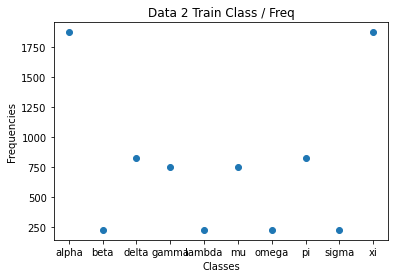

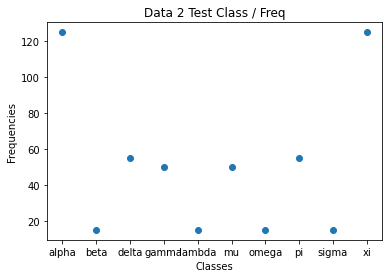

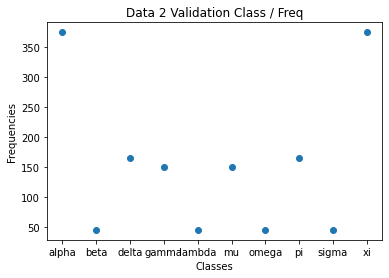

In [7]:
# Distributions for Data 2
distribution(train_data_2, "Data 2 Train Class / Freq", data_2)
distribution(labeled_test_data_2, "Data 2 Test Class / Freq", data_2)
distribution(val_data_2, "Data 2 Validation Class / Freq", data_2)

# General Model Testing/Training Procedure (Supervised)
### Training
- Split training data into features vectors (x_train) and label vector (y_train)
- Fit data to the model

### Testing
- Split test data into features vector (x_test) and label vector (y_test)
- Get label classification vector from trained model (prediction)

### Output
- Print actual labels
- Print model label predictions
- Print model label predictions to csv file
- Print prediction misses (comparision between prediction and y_test)
- Compare model label classification vector (prediction) to label vector (y_test)
    

# Gaussian Naive Bayes

In [8]:
# GNB-DS1
x_train = train_data_1[ :, :-1]
y_train = train_data_1[ :, -1]

gnb.fit(x_train, y_train)

x_test = labeled_test_data_1[ :, :-1]
y_test = labeled_test_data_1[ :, -1]

prediction = gnb.predict(x_test)
print([(entry, data_1[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_1[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')
with open('GNB-DS1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'F'), (1, 'N'), (2, 'H'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'Z'), (7, 'X'), (8, 'W'), (9, 'U'), (10, 'G'), (11, 'J'), (12, 'L'), (13, 'T'), (14, 'B'), (15, 'F'), (16, 'B'), (17, 'I'), (18, 'C'), (19, 'M'), (20, 'Q'), (21, 'A'), (22, 'Z'), (23, 'R'), (24, 'Q'), (25, 'B'), (26, 'W'), (27, 'I'), (28, 'V'), (29, 'M'), (30, 'B'), (31, 'M'), (32, 'K'), (33, 'Q'), (34, 'K'), (35, 'R'), (36, 'Q'), (37, 'B'), (38, 'P'), (39, 'M'), (40, 'Q'), (41, 'L'), (42, 'N'), (43, 'B'), (44, 'N'), (45, 'R'), (46, 'M'), (47, 'O'), (48, 'Y'), (49, 'A'), (50, 'A'), (51, 'D'), (52, 'W'), (53, 'U'), (54, 'D'), (55, 'O'), (56, 'Z'), (57, 'J'), (58, 'P'), (59, 'O'), (60, 'N'), (61, 'C'), (62, 'L'), (63, 'M'), (64, 'R'), (65, 'G'), (66, 'G'), (67, 'U'), (68, 'N'), (69, 'D'), (70, 'Y'), (71, 'W'), (72, 'V'), (73, 'I'), (74, 'V'), (75, 'S'), (76, 'A'), (77, 'R'), (78, 'M'), (79, 'T')]
[(0, 'E'), (1, 'N'), (2, 'H'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'L'), (7, 'X'), (8, 'W'), (9, 'U'), (10, 'C'), (11, 'J'), (12, '

In [9]:
# GNB-DS2
x_train = train_data_2[ :, :-1]
y_train = train_data_2[ :, -1]

gnb.fit(x_train, y_train)

x_test = labeled_test_data_2[ :, :-1]
y_test = labeled_test_data_2[ :, -1]

prediction = gnb.predict(x_test)
print([(entry, data_2[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_2[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')
with open('GNB-DS2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'xi'), (1, 'sigma'), (2, 'pi'), (3, 'delta'), (4, 'xi'), (5, 'sigma'), (6, 'alpha'), (7, 'sigma'), (8, 'lambda'), (9, 'xi'), (10, 'pi'), (11, 'alpha'), (12, 'sigma'), (13, 'xi'), (14, 'beta'), (15, 'sigma'), (16, 'xi'), (17, 'xi'), (18, 'omega'), (19, 'alpha'), (20, 'lambda'), (21, 'alpha'), (22, 'beta'), (23, 'omega'), (24, 'xi'), (25, 'beta'), (26, 'alpha'), (27, 'alpha'), (28, 'beta'), (29, 'beta'), (30, 'xi'), (31, 'beta'), (32, 'beta'), (33, 'xi'), (34, 'beta'), (35, 'alpha'), (36, 'lambda'), (37, 'xi'), (38, 'alpha'), (39, 'alpha'), (40, 'sigma'), (41, 'omega'), (42, 'gamma'), (43, 'delta'), (44, 'xi'), (45, 'xi'), (46, 'alpha'), (47, 'sigma'), (48, 'lambda'), (49, 'alpha'), (50, 'pi'), (51, 'gamma'), (52, 'delta'), (53, 'xi'), (54, 'pi'), (55, 'pi'), (56, 'mu'), (57, 'delta'), (58, 'lambda'), (59, 'alpha'), (60, 'alpha'), (61, 'lambda'), (62, 'sigma'), (63, 'pi'), (64, 'lambda'), (65, 'alpha'), (66, 'alpha'), (67, 'xi'), (68, 'pi'), (69, 'pi'), (70, 'sigma'), (71, 'pi'), (7

# Baseline Decision Trees
### Parameters
- splitting criterion: entropy
- maximum depth: none
- min # of samples to split an internal node: 2
- min impurity decrease: 0.0
- class weight: none

In [10]:
# Base-DT-DS1
x_train = train_data_1[ :, :-1]
y_train = train_data_1[ :, -1]

base_t.fit(x_train, y_train)

x_test = labeled_test_data_1[ :, :-1]
y_test = labeled_test_data_1[ :, -1]

prediction = base_t.predict(x_test)
print([(entry, data_1[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_1[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')

with open('Base-DT-DS1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'Z'), (1, 'N'), (2, 'W'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'L'), (7, 'N'), (8, 'N'), (9, 'U'), (10, 'G'), (11, 'J'), (12, 'L'), (13, 'J'), (14, 'E'), (15, 'F'), (16, 'G'), (17, 'D'), (18, 'C'), (19, 'M'), (20, 'D'), (21, 'A'), (22, 'J'), (23, 'R'), (24, 'J'), (25, 'E'), (26, 'W'), (27, 'U'), (28, 'X'), (29, 'L'), (30, 'B'), (31, 'X'), (32, 'G'), (33, 'O'), (34, 'M'), (35, 'Y'), (36, 'S'), (37, 'T'), (38, 'J'), (39, 'R'), (40, 'Q'), (41, 'U'), (42, 'N'), (43, 'P'), (44, 'N'), (45, 'V'), (46, 'N'), (47, 'O'), (48, 'Y'), (49, 'A'), (50, 'H'), (51, 'D'), (52, 'V'), (53, 'U'), (54, 'P'), (55, 'O'), (56, 'W'), (57, 'J'), (58, 'B'), (59, 'O'), (60, 'N'), (61, 'C'), (62, 'L'), (63, 'K'), (64, 'A'), (65, 'A'), (66, 'C'), (67, 'U'), (68, 'Y'), (69, 'V'), (70, 'Y'), (71, 'A'), (72, 'V'), (73, 'I'), (74, 'V'), (75, 'S'), (76, 'P'), (77, 'F'), (78, 'C'), (79, 'T')]
[(0, 'E'), (1, 'N'), (2, 'H'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'L'), (7, 'X'), (8, 'W'), (9, 'U'), (10, 'C'), (11, 'J'), (12, '

In [11]:
# Base-DT-DS2
x_train = train_data_2[ :, :-1]
y_train = train_data_2[ :, -1]

base_t.fit(x_train, y_train)

x_test = labeled_test_data_2[ :, :-1]
y_test = labeled_test_data_2[ :, -1]

prediction = base_t.predict(x_test)
print([(entry, data_2[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_2[y_test[entry]]) for entry in range(y_test.size)])
prediction = base_t.predict(x_test)
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')

with open('Base-DT-DS2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'xi'), (1, 'gamma'), (2, 'mu'), (3, 'delta'), (4, 'xi'), (5, 'sigma'), (6, 'alpha'), (7, 'sigma'), (8, 'mu'), (9, 'xi'), (10, 'xi'), (11, 'alpha'), (12, 'sigma'), (13, 'xi'), (14, 'pi'), (15, 'alpha'), (16, 'xi'), (17, 'xi'), (18, 'omega'), (19, 'alpha'), (20, 'lambda'), (21, 'alpha'), (22, 'xi'), (23, 'omega'), (24, 'xi'), (25, 'mu'), (26, 'alpha'), (27, 'alpha'), (28, 'mu'), (29, 'mu'), (30, 'xi'), (31, 'mu'), (32, 'mu'), (33, 'xi'), (34, 'pi'), (35, 'alpha'), (36, 'xi'), (37, 'xi'), (38, 'alpha'), (39, 'alpha'), (40, 'gamma'), (41, 'omega'), (42, 'pi'), (43, 'xi'), (44, 'xi'), (45, 'gamma'), (46, 'alpha'), (47, 'alpha'), (48, 'delta'), (49, 'alpha'), (50, 'alpha'), (51, 'pi'), (52, 'delta'), (53, 'xi'), (54, 'pi'), (55, 'alpha'), (56, 'mu'), (57, 'delta'), (58, 'xi'), (59, 'alpha'), (60, 'alpha'), (61, 'delta'), (62, 'pi'), (63, 'pi'), (64, 'xi'), (65, 'pi'), (66, 'alpha'), (67, 'gamma'), (68, 'pi'), (69, 'xi'), (70, 'alpha'), (71, 'alpha'), (72, 'alpha'), (73, 'delta'), (74, '

# Optimized Decision Trees
### Parameters
- splitting criterion: gini / entropy
- maximum depth: 10 / no max
- min # of samples to split an internal node: range(1/10^100 - 1/10^110)
- min impurity decrease: range(1/10^100 - 1/10^110)
- class weight: none / balanced
### Brute Force Optimization Process
- Trains new tree with different h-parameter to determine best performance
    - Loops through a variety of parameters, tracking the best case of predictions misses (best)
- Findings
    - Entropy as a split criterion is the best h-parameter
    - No max depth for the tree is the best h-parameter
    - Balanced class weights is the best h-parameter
    - Min Samples Split works best at very small numbers
        - testing with range down to 1/100000
    - Min Impurity Decrease works best at very small numbers
        - testing with range down to 1/100000

In [12]:
# Tree Optimization DS1
x_train = train_data_1[ :, :-1]
y_train = train_data_1[ :, -1]

x_val = val_data_1[ :, :-1]
y_val = val_data_1[ :, -1]

x_test = labeled_test_data_1[ :, :-1]
y_test = labeled_test_data_1[ :, -1]

best = 239

def tree_score(sample, impurity):
    best_tree = tree.DecisionTreeClassifier(criterion="entropy", # Entropy is the best split criterion
                                       max_depth=None, # No max depth is best h-parameter
                                       min_samples_split=sample, # Small numbers here for best predictions
                                       min_impurity_decrease=impurity, # Small numbers here for best predictions
                                       class_weight="balanced") # Balanced class weights is the best h-paramter
    best_tree.fit(x_train, y_train)
    pred = best_tree.predict(x_val)
    return (y_val != pred).sum()

tuned_samples = 0
tuned_impurities = 0

for samples in [1/(10**x) for x in range(100, 110, 1)]: # Min Number of Samples
    for impurities in [1/(10**y) for y in range(100, 110, 1)]: # Min Impurity 
        # Decrease
            missed = tree_score(samples, impurities)
            if missed < best:
                print(f'Splitting Criterion: Entropy\n'
                      f'Max Depth: None\n'
                      f'Min # Samples: {samples}\n'
                      f'Min Impurity Decrease:{impurities}\n'
                      f'Class Weights: Balanced')
                tuned_samples = samples
                tuned_impurities = impurities
                best = missed
                print(missed)
            
tuned = tree.DecisionTreeClassifier(criterion="entropy", # Entropy is the best split criterion
                                       max_depth=None, # No max depth is best h-parameter
                                       min_samples_split=tuned_samples, # Small numbers here for best predictions
                                       min_impurity_decrease=tuned_impurities, # Small numbers here for best predictions
                                       class_weight="balanced")

prediction = tuned.fit(x_train, y_train).predict(x_test)
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')
with open('Best-DT-DS1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-100
Class Weights: Balanced
132
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-106
Class Weights: Balanced
131
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-107
Class Weights: Balanced
130
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-101
Min Impurity Decrease:1e-106
Class Weights: Balanced
129
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-107
Min Impurity Decrease:1e-104
Class Weights: Balanced
127
Missed: 38 out of 80


In [13]:
# Tree Optimization DS2
x_train = train_data_2[ :, :-1]
y_train = train_data_2[ :, -1]

x_val = val_data_2[ :, :-1]
y_val = val_data_2[ :, -1]

x_test = labeled_test_data_2[ :, :-1]
y_test = labeled_test_data_2[ :, -1]

best = 1560

tuned_samples = 0
tuned_impurities = 0

for samples in [1/(10**x) for x in range(100, 110, 1)]: # Min Number of Samples
    for impurities in [1/(10**y) for y in range(100, 110, 1)]: # Min Impurity 
        # Decrease
            missed = tree_score(samples, impurities)
            if missed < best:
                print(f'Splitting Criterion: Entropy\n'
                      f'Max Depth: None\n'
                      f'Min # Samples: {samples}\n'
                      f'Min Impurity Decrease:{impurities}\n'
                      f'Class Weights: Balanced')
                tuned_samples = samples
                tuned_impurities = impurities
                best = missed
                print(missed)

tuned = tree.DecisionTreeClassifier(criterion="entropy", # Entropy is the best split criterion
                                       max_depth=None, # No max depth is best h-parameter
                                       min_samples_split=tuned_samples, # Small numbers here for best predictions
                                       min_impurity_decrease=tuned_impurities, # Small numbers here for best predictions
                                       class_weight="balanced")

prediction = tuned.fit(x_train, y_train).predict(x_test)
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')
with open('Best-DT-DS2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-100
Class Weights: Balanced
380
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-101
Class Weights: Balanced
379
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-102
Class Weights: Balanced
377
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-103
Class Weights: Balanced
364
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-100
Min Impurity Decrease:1e-106
Class Weights: Balanced
356
Splitting Criterion: Entropy
Max Depth: None
Min # Samples: 1e-108
Min Impurity Decrease:1e-101
Class Weights: Balanced
353
Missed: 120 out of 520


# Perceptrons

In [14]:
#PER-DS1
x_train = train_data_1[ :, :-1]
y_train = train_data_1[ :, -1]

per.fit(x_train, y_train)

x_test = labeled_test_data_1[ :, :-1]
y_test = labeled_test_data_1[ :, -1]

prediction = per.predict(x_test)
print([(entry, data_1[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_1[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')

with open('PER-DS1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'E'), (1, 'N'), (2, 'R'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'L'), (7, 'X'), (8, 'W'), (9, 'U'), (10, 'L'), (11, 'J'), (12, 'L'), (13, 'F'), (14, 'E'), (15, 'F'), (16, 'A'), (17, 'I'), (18, 'C'), (19, 'A'), (20, 'Q'), (21, 'A'), (22, 'J'), (23, 'R'), (24, 'J'), (25, 'B'), (26, 'V'), (27, 'I'), (28, 'Y'), (29, 'A'), (30, 'D'), (31, 'R'), (32, 'K'), (33, 'Q'), (34, 'K'), (35, 'R'), (36, 'Q'), (37, 'T'), (38, 'P'), (39, 'P'), (40, 'Q'), (41, 'L'), (42, 'N'), (43, 'B'), (44, 'N'), (45, 'H'), (46, 'K'), (47, 'O'), (48, 'Y'), (49, 'A'), (50, 'H'), (51, 'D'), (52, 'W'), (53, 'U'), (54, 'D'), (55, 'O'), (56, 'Z'), (57, 'J'), (58, 'P'), (59, 'O'), (60, 'M'), (61, 'C'), (62, 'L'), (63, 'H'), (64, 'R'), (65, 'G'), (66, 'G'), (67, 'U'), (68, 'M'), (69, 'N'), (70, 'Y'), (71, 'W'), (72, 'V'), (73, 'I'), (74, 'V'), (75, 'S'), (76, 'P'), (77, 'R'), (78, 'G'), (79, 'F')]
[(0, 'E'), (1, 'N'), (2, 'H'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'L'), (7, 'X'), (8, 'W'), (9, 'U'), (10, 'C'), (11, 'J'), (12, '

In [15]:
#PER-DS2
x_train = train_data_2[ :, :-1]
y_train = train_data_2[ :, -1]

per.fit(x_train, y_train)

x_test = labeled_test_data_2[ :, :-1]
y_test = labeled_test_data_2[ :, -1]

prediction = per.predict(x_test)
print([(entry, data_1[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_1[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')

with open('PER-DS2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'J'), (1, 'A'), (2, 'E'), (3, 'F'), (4, 'J'), (5, 'B'), (6, 'B'), (7, 'D'), (8, 'I'), (9, 'J'), (10, 'A'), (11, 'B'), (12, 'D'), (13, 'J'), (14, 'J'), (15, 'D'), (16, 'J'), (17, 'J'), (18, 'H'), (19, 'B'), (20, 'G'), (21, 'B'), (22, 'J'), (23, 'H'), (24, 'J'), (25, 'B'), (26, 'B'), (27, 'B'), (28, 'I'), (29, 'I'), (30, 'J'), (31, 'I'), (32, 'A'), (33, 'J'), (34, 'I'), (35, 'B'), (36, 'J'), (37, 'J'), (38, 'B'), (39, 'B'), (40, 'B'), (41, 'H'), (42, 'A'), (43, 'F'), (44, 'J'), (45, 'J'), (46, 'B'), (47, 'B'), (48, 'F'), (49, 'B'), (50, 'J'), (51, 'A'), (52, 'F'), (53, 'J'), (54, 'A'), (55, 'A'), (56, 'I'), (57, 'F'), (58, 'E'), (59, 'B'), (60, 'B'), (61, 'J'), (62, 'A'), (63, 'A'), (64, 'J'), (65, 'A'), (66, 'B'), (67, 'E'), (68, 'A'), (69, 'B'), (70, 'D'), (71, 'B'), (72, 'B'), (73, 'J'), (74, 'F'), (75, 'I'), (76, 'J'), (77, 'B'), (78, 'A'), (79, 'J'), (80, 'H'), (81, 'B'), (82, 'A'), (83, 'F'), (84, 'A'), (85, 'G'), (86, 'J'), (87, 'J'), (88, 'H'), (89, 'B'), (90, 'I'), (91, 'F'

# Baseline Multilayer Perceptrons
### Parameters
- 1 hidden layer of 100 neurons
- logistic as activation function
- stochastic gradient descent
- default values for the rest of the parameters

In [16]:
#Base-MLP-DS1
x_train = train_data_1[ :, :-1]
y_train = train_data_1[ :, -1]

base_mlp.fit(x_train, y_train)

x_test = labeled_test_data_1[ :, :-1]
y_test = labeled_test_data_1[ :, -1]

prediction = base_mlp.predict(x_test)
print([(entry, data_1[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_1[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')

with open('Base-MLP-DS1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'L'), (1, 'N'), (2, 'R'), (3, 'C'), (4, 'G'), (5, 'R'), (6, 'L'), (7, 'R'), (8, 'W'), (9, 'L'), (10, 'O'), (11, 'J'), (12, 'L'), (13, 'I'), (14, 'L'), (15, 'K'), (16, 'K'), (17, 'I'), (18, 'C'), (19, 'A'), (20, 'O'), (21, 'A'), (22, 'J'), (23, 'R'), (24, 'I'), (25, 'R'), (26, 'W'), (27, 'I'), (28, 'R'), (29, 'G'), (30, 'O'), (31, 'K'), (32, 'K'), (33, 'O'), (34, 'K'), (35, 'K'), (36, 'C'), (37, 'I'), (38, 'I'), (39, 'O'), (40, 'O'), (41, 'K'), (42, 'K'), (43, 'R'), (44, 'K'), (45, 'K'), (46, 'K'), (47, 'O'), (48, 'I'), (49, 'A'), (50, 'H'), (51, 'I'), (52, 'W'), (53, 'L'), (54, 'O'), (55, 'O'), (56, 'A'), (57, 'J'), (58, 'R'), (59, 'O'), (60, 'M'), (61, 'L'), (62, 'L'), (63, 'K'), (64, 'R'), (65, 'G'), (66, 'G'), (67, 'O'), (68, 'M'), (69, 'N'), (70, 'N'), (71, 'W'), (72, 'M'), (73, 'I'), (74, 'W'), (75, 'G'), (76, 'K'), (77, 'R'), (78, 'G'), (79, 'I')]
[(0, 'E'), (1, 'N'), (2, 'H'), (3, 'C'), (4, 'S'), (5, 'R'), (6, 'L'), (7, 'X'), (8, 'W'), (9, 'U'), (10, 'C'), (11, 'J'), (12, '

c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [17]:
#Base-MLP-DS2
x_train = train_data_2[ :, :-1]
y_train = train_data_2[ :, -1]

base_mlp.fit(x_train, y_train)

x_test = labeled_test_data_2[ :, :-1]
y_test = labeled_test_data_2[ :, -1]

prediction = base_mlp.predict(x_test)
print([(entry, data_1[prediction[entry]]) for entry in range(prediction.size)])
print([(entry, data_1[y_test[entry]]) for entry in range(y_test.size)])
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')

with open('Base-MLP-DS2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

[(0, 'J'), (1, 'A'), (2, 'E'), (3, 'F'), (4, 'J'), (5, 'B'), (6, 'B'), (7, 'D'), (8, 'I'), (9, 'J'), (10, 'F'), (11, 'B'), (12, 'D'), (13, 'J'), (14, 'J'), (15, 'D'), (16, 'J'), (17, 'J'), (18, 'H'), (19, 'B'), (20, 'G'), (21, 'B'), (22, 'J'), (23, 'H'), (24, 'J'), (25, 'I'), (26, 'B'), (27, 'B'), (28, 'I'), (29, 'I'), (30, 'J'), (31, 'I'), (32, 'I'), (33, 'J'), (34, 'I'), (35, 'B'), (36, 'J'), (37, 'J'), (38, 'B'), (39, 'B'), (40, 'B'), (41, 'H'), (42, 'J'), (43, 'F'), (44, 'J'), (45, 'J'), (46, 'B'), (47, 'B'), (48, 'F'), (49, 'B'), (50, 'J'), (51, 'J'), (52, 'F'), (53, 'J'), (54, 'A'), (55, 'A'), (56, 'I'), (57, 'F'), (58, 'J'), (59, 'B'), (60, 'B'), (61, 'J'), (62, 'A'), (63, 'A'), (64, 'J'), (65, 'A'), (66, 'B'), (67, 'E'), (68, 'A'), (69, 'A'), (70, 'D'), (71, 'A'), (72, 'B'), (73, 'J'), (74, 'F'), (75, 'I'), (76, 'J'), (77, 'B'), (78, 'A'), (79, 'J'), (80, 'H'), (81, 'B'), (82, 'A'), (83, 'F'), (84, 'A'), (85, 'J'), (86, 'J'), (87, 'J'), (88, 'H'), (89, 'B'), (90, 'I'), (91, 'E'

c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


# Optimized Multilayer Perceptrons
### Paramters
- 2 hidden layers with 30+50 nodes / 3 hidden layers with 10+10 nodes
- logistic/tanh/relu/identity as activation function
- stochastic gradient descent / Adam
- default values for the rest of the parameters
### Brute Force Optimization Process
- Trains new MLP with different h-parameter to determine best performance
    - Loops through a variety of parameters, tracking the best case of predictions misses (best)

In [23]:
# MLP Optimization DS1
x_train = train_data_1[ :, :-1]
y_train = train_data_1[ :, -1]

x_val = val_data_1[ :, :-1]
y_val = val_data_1[ :, -1]

x_test = labeled_test_data_1[ :, :-1]
y_test = labeled_test_data_1[ :, -1]

best = 239

def mlp_score(layer, funct, solver):
    best_mlp = MLPClassifier(hidden_layer_sizes=layer, activation=funct, solver=solver)
    best_mlp.fit(x_train, y_train)
    pred = best_mlp.predict(x_val)
    return (y_val != pred).sum()

layers = [(30, 50), (10, 10, 10)]
functions = ["logistic", "tanh", "relu", "identity"]
solvers = ["sgd", "adam"]

tuned_layers = None
tuned_function = None
tuned_solver = None

for layer in layers:
    for function in functions:
        for solver in solvers:
            missed = mlp_score(layer, function, solver)
            if missed < best:
                print(f'Layers: {layer}\n'
                      f'Activation Function: {function}\n'
                      f'Solver: {solver}')
                tuned_layers = layer
                tuned_function = function
                tuned_solver = solver
                best = missed
                print(missed)
            
tuned = MLPClassifier(hidden_layer_sizes=tuned_layers, activation=tuned_function, solver=tuned_solver)

prediction = tuned.fit(x_train, y_train).predict(x_test)
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')
with open('Best-MLP-DS1.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

Layers: (30, 50)
Activation Function: logistic
Solver: sgd
231
Layers: (30, 50)
Activation Function: logistic
Solver: adam
47
Layers: (30, 50)
Activation Function: identity
Solver: adam
44
Missed: 11 out of 80


c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

In [24]:
# MLP Optimization DS2
x_train = train_data_2[ :, :-1]
y_train = train_data_2[ :, -1]

x_val = val_data_2[ :, :-1]
y_val = val_data_2[ :, -1]

x_test = labeled_test_data_2[ :, :-1]
y_test = labeled_test_data_2[ :, -1]

best = 1560

def mlp_score(layer, funct, solver):
    best_mlp = MLPClassifier(hidden_layer_sizes=layer, activation=funct, solver=solver)
    best_mlp.fit(x_train, y_train)
    pred = best_mlp.predict(x_val)
    return (y_val != pred).sum()

layers = [(30,50), (10, 10, 10)]
functions = ["logistic", "tanh", "relu", "identity"]
solvers = ["sgd", "adam"]

tuned_layers = None
tuned_function = None
tuned_solver = None

for layer in layers:
    for function in functions:
        for solver in solvers:
            missed = mlp_score(layer, function, solver)
            if missed < best:
                print(f'Layers: {layer}\n'
                      f'Activation Function: {function}\n'
                      f'Solver: {solver}')
                tuned_layers = layer
                tuned_function = function
                tuned_solver = solver
                best = missed
                print(missed)
            
tuned = MLPClassifier(hidden_layer_sizes=tuned_layers, activation=tuned_function, solver=tuned_solver)

prediction = tuned.fit(x_train, y_train).predict(x_test)
print(f'Missed: {(y_test != prediction).sum()} out of {len(y_test)}')
with open('Best-MLP-DS2.csv', 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for entry in range(prediction.size):
        writer.writerow([entry, int(prediction[entry])])

c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\programdata\anaconda3\envs\comp-472\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the op

Layers: (30, 50)
Activation Function: logistic
Solver: sgd
604
Layers: (30, 50)
Activation Function: logistic
Solver: adam
185
Layers: (30, 50)
Activation Function: tanh
Solver: sgd
169
Layers: (30, 50)
Activation Function: tanh
Solver: adam
162
Missed: 70 out of 520
